In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings; warnings.filterwarnings('ignore')

In [2]:
#Loading dataset
df = pd.read_csv('Iris.csv')

In [3]:
df['Species'] = LabelEncoder().fit_transform(df['Species'])


In [4]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [5]:
#Dataset info
df.shape

(150, 6)

In [6]:
df.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
#Extracting and analysing through isolation forest
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.1, random_state=42)
df['is_inlier_IF'] = iso_forest.fit_predict(df)

In [8]:
inliers_IF = df[df['is_inlier_IF'] == 1]
outliers_IF = df[df['is_inlier_IF'] == -1]

In [9]:
outliers_IF

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,is_inlier_IF
13,14,4.3,3.0,1.1,0.1,0,-1
14,15,5.8,4.0,1.2,0.2,0,-1
15,16,5.7,4.4,1.5,0.4,0,-1
41,42,4.5,2.3,1.3,0.3,0,-1
60,61,5.0,2.0,3.5,1.0,1,-1
98,99,5.1,2.5,3.0,1.1,1,-1
100,101,6.3,3.3,6.0,2.5,2,-1
105,106,7.6,3.0,6.6,2.1,2,-1
106,107,4.9,2.5,4.5,1.7,2,-1
109,110,7.2,3.6,6.1,2.5,2,-1


In [10]:
inliers_IF

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,is_inlier_IF
0,1,5.1,3.5,1.4,0.2,0,1
1,2,4.9,3.0,1.4,0.2,0,1
2,3,4.7,3.2,1.3,0.2,0,1
3,4,4.6,3.1,1.5,0.2,0,1
4,5,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2,1
146,147,6.3,2.5,5.0,1.9,2,1
147,148,6.5,3.0,5.2,2.0,2,1
148,149,6.2,3.4,5.4,2.3,2,1


In [11]:
def is_inlier(row):
    # Sepal length constraint: 4 cm ≤ Sepal length ≤ 8 cm
    if row['SepalLengthCm'] < 4 or row['SepalLengthCm'] >8:
        return -1
    
    # Sepal width constraint: 2 cm ≤ Sepal width ≤ 4.5 cm
    if row['SepalWidthCm'] < 2 or row['SepalWidthCm'] > 4.5:
        return -1
    
    # Petal length and species-specific constraints
    if row['Species'] == 'Iris-setosa':
        # Setosa: 1 cm ≤ Petal length ≤ 1.9 cm
        if row['PetalLengthCm'] < 1 or row['PetalLengthCm'] > 1.9:
            return -1
    elif row['Species'] == 'Iris-versicolor':
        # Versicolor: 3 cm ≤ Petal length ≤ 5.1 cm
        if row['PetalLengthCm'] < 3 or row['PetalLengthCm'] > 5.1:
            return -1
    elif row['Species'] == 'Iris-virginica':
        # Virginica: 4.5 cm ≤ Petal length ≤ 6.9 cm
        if row['PetalLengthCm'] < 4.5 or row['PetalLengthCm'] > 6.9:
            return -1

    # Petal width constraint: 0.1 cm ≤ Petal width ≤ 3 cm
    if row['PetalWidthCm'] < 0.1 or row['PetalWidthCm'] > 3:
        return -1
    
    # If all constraints are satisfied, return True
    return 1

In [12]:
#Extracting and analysing through human-written constraints
df['is_inlier_HW'] = df.apply(is_inlier, axis=1)

In [13]:
inliers_HW = df[df['is_inlier_HW'] == 1]
outliers_HW = df[df['is_inlier_HW'] == -1]
outliers_HW

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,is_inlier_IF,is_inlier_HW


In [14]:
#disagreements between two methods
df['similar'] = abs(df['is_inlier_IF'] + df['is_inlier_HW']) / 2

In [15]:
mismatch = df[df['similar'] == 0]
similar = df[df['similar'] == 1]

In [16]:
#writing the disagreed datapoints into csv
mismatch.to_csv("disagreement.csv")

In [17]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

conf_matrix = confusion_matrix(df['is_inlier_HW'], df['is_inlier_IF'])
conf_matrix

array([[  0,   0],
       [ 15, 135]])

Text(95.72222222222221, 0.5, 'Handwritten')

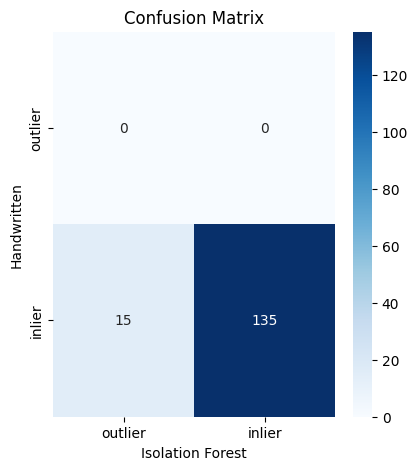

In [18]:
# Plot confusion matrix
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["outlier","inlier"], yticklabels=["outlier","inlier"])
plt.title("Confusion Matrix")
plt.xlabel("Isolation Forest")
plt.ylabel("Handwritten")

In [19]:
#Both agree it is inlier
all_inlier = df[(df['is_inlier_IF'] == 1) & (df['is_inlier_HW'] == 1)] 
all_inlier.to_csv("all_inlier.csv")

In [20]:
#Both agree it is outlier
all_outlier = df[(df['is_inlier_IF'] == -1) & (df['is_inlier_HW'] == -1)] 
all_outlier.to_csv("all_outlier.csv")